In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("D:/Projects/End to End Projects/Anemia Prediction Project/Notebook/Dataset/Anemia_Dataset.csv")

In [92]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [93]:
df.shape

(1421, 6)

In [94]:
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [95]:
Category=[i for i in df.columns if df[i].dtypes==int]

In [96]:
for i in df.columns:
    if i in Category:
        print(df[i].value_counts())

Gender
1    740
0    681
Name: count, dtype: int64
Result
0    801
1    620
Name: count, dtype: int64


In [97]:
df.corr()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
Gender,1.000000,0.010972,0.001042,0.014574,-0.040447,0.253169
Hemoglobin,0.010972,1.000000,0.014081,-0.042597,-0.025885,-0.796261
MCH,0.001042,0.014081,1.000000,0.018795,-0.015948,-0.028678
MCHC,0.014574,-0.042597,0.018795,1.000000,0.068450,0.048067
MCV,-0.040447,-0.025885,-0.015948,0.068450,1.000000,-0.020571
Result,0.253169,-0.796261,-0.028678,0.048067,-0.020571,1.000000


Text(0.5, 1.0, 'Correlation matrix')

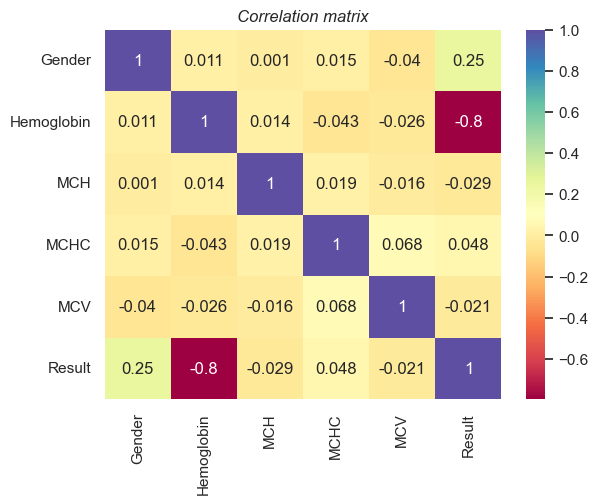

In [98]:
sns.heatmap(data=df.corr(),cmap='Spectral',annot=True)
plt.title("Correlation matrix",style='italic')

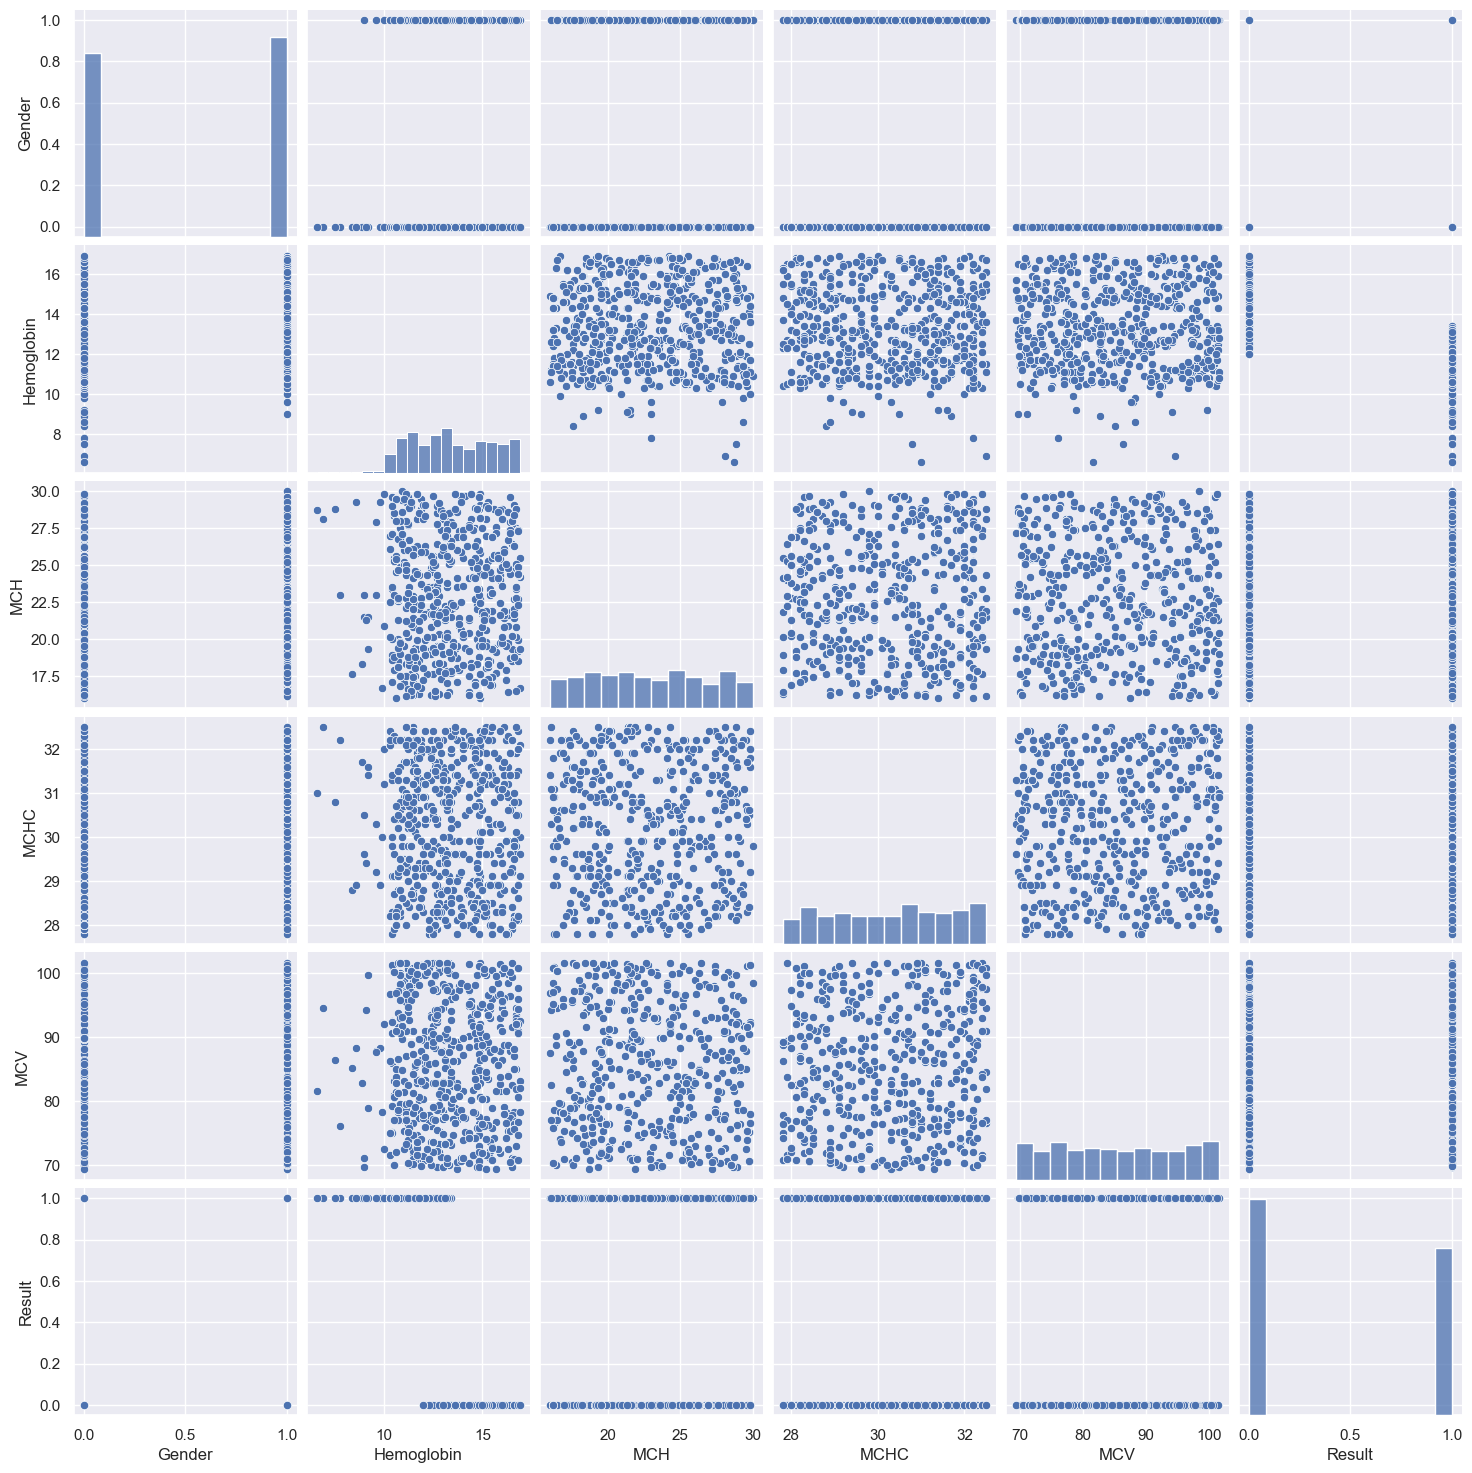

In [99]:
sns.pairplot(df)

In [100]:
for i in range (1,6):
    print (i)

1
2
3
4
5


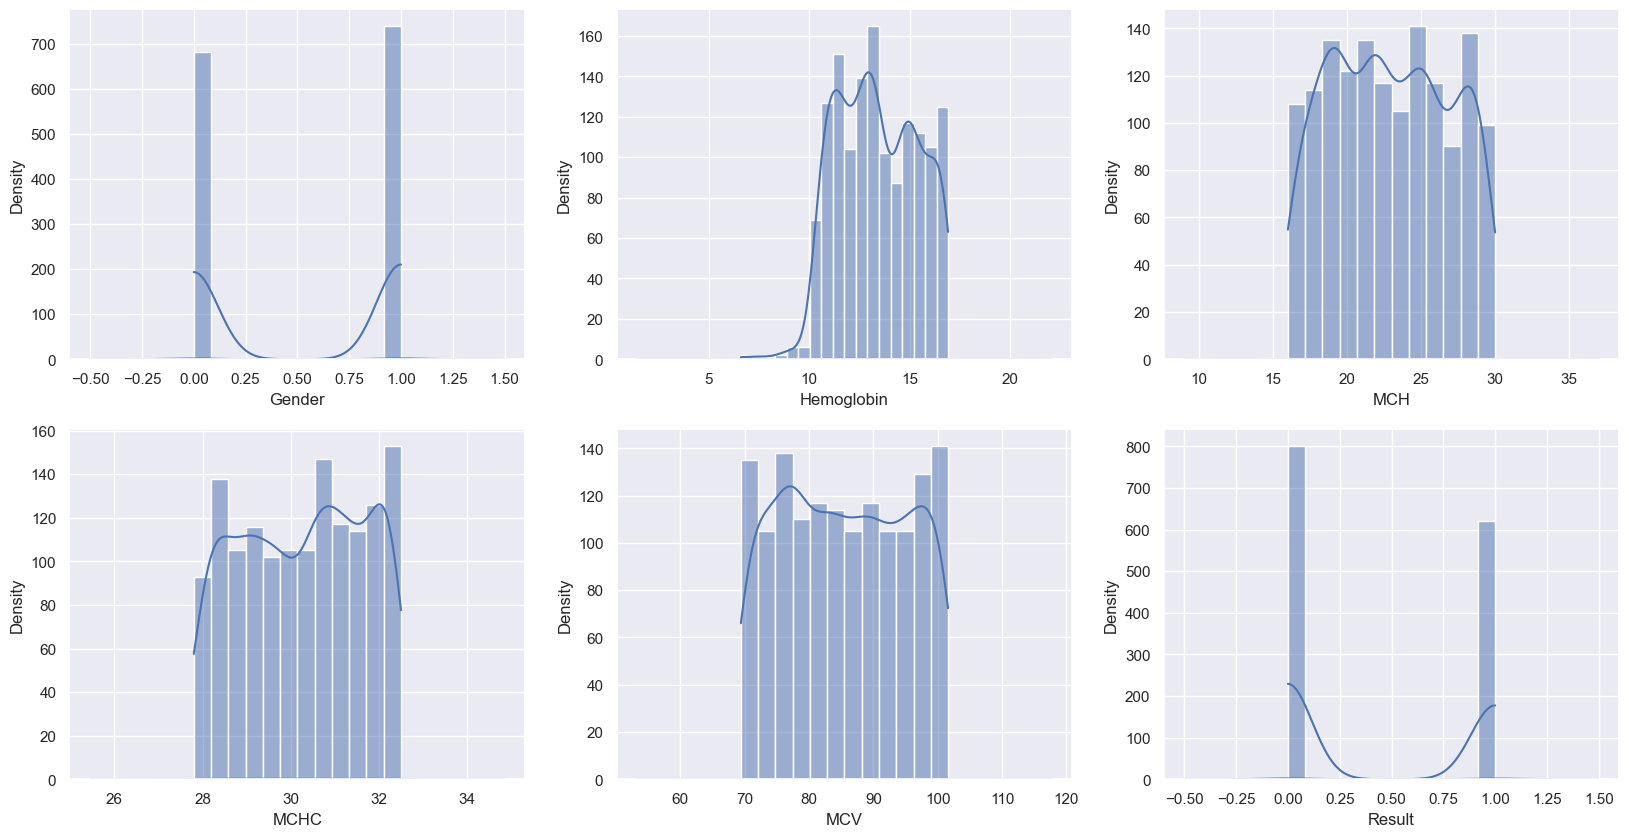

In [101]:
n=1
plt.figure(figsize=(20,10))
sns.set_theme("notebook")

for i in df.columns:
    plt.subplot(2,3,n)
    sns.histplot(kde=True,data=df,x=df[i])
    df[i].plot(kind='kde')
    plt.xlabel(i)
    
    n=n+1

In [102]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [103]:
Category

['Gender', 'Result']

In [104]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [105]:
df.duplicated().sum()

np.int64(887)

In [106]:
df=df.drop_duplicates().reset_index(drop=True)

In [107]:
df.duplicated().sum()

np.int64(0)

In [108]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [109]:
X=df.drop(columns='Result',axis=1)
Y=df['Result']

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

array([[ 0.95602222,  0.78132543, -0.05373806, -0.81463316, -0.20289877],
       [-1.04600079,  1.26574175,  0.63071014, -1.38161146, -1.42216481],
       [-1.04600079, -2.07673088, -0.35793726, -0.46027171, -1.50553343],
       ...,
       [ 0.95602222,  0.7328838 , -0.86493593,  1.38240778, -1.41174374],
       [ 0.95602222, -0.04218232, -0.63678653, -1.59422833,  1.22478883],
       [ 0.95602222, -0.13906558,  0.78280974,  0.81542947, -0.29668846]])

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [113]:
def evaluate_model(true,predicted):
    accuracy=accuracy_score(true,predicted)
    c_matrix=confusion_matrix(true,predicted)
    c_report=classification_report(true,predicted)
    return accuracy,c_matrix,c_report

In [114]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "SVC":SVC(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}
model_list=[]
accuracy_list=[]

In [115]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_a_score,model_train_c_matrix,model_train_c_report=evaluate_model(Y_train,y_train_pred)
    model_test_a_score,model_test_c_matrix,model_test_c_report=evaluate_model(Y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Dataset")
    print("Accuracy score {}".format(model_train_a_score))
    print("Confusion Matrix {}".format(model_train_c_matrix))
    print("Classification report {}".format(model_train_c_report))

    print ("------------------------------------------")

    print("Model Performance for test dataset")
    print("Accuracy score {}".format(model_test_a_score))
    print("Confusion Matrix {}".format(model_test_c_matrix))
    print("Classification report {}".format(model_test_c_report))
    accuracy_list.append(model_test_a_score)

    print("="*35)
    print('\n')



LogisticRegression
Model Performance for Training Dataset
Accuracy score 0.9836065573770492
Confusion Matrix [[219   7]
 [  0 201]]
Classification report               precision    recall  f1-score   support

           0       1.00      0.97      0.98       226
           1       0.97      1.00      0.98       201

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

------------------------------------------
Model Performance for test dataset
Accuracy score 0.9813084112149533
Confusion Matrix [[59  2]
 [ 0 46]]
Classification report               precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.96      1.00      0.98        46

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



DecisionTreeClassifi

d:\Projects\Basic_ML_Projects\mlproj\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [116]:
pd.DataFrame(list(zip(model_list,accuracy_list)),columns=['Model_Name','Accuracy_Score']).sort_values(by='Accuracy_Score',ascending=False)

,Model_Name,Accuracy_Score
1,DecisionTreeClassifier,1.000000
3,RandomForestClassifier,1.000000
5,AdaBoostClassifier,1.000000
4,GradientBoostingClassifier,1.000000
0,LogisticRegression,0.981308
2,SVC,0.859813
